In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
import pypyodbc as podbc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os

In [95]:
import json

with open('/home/federico/Documents/UNTREF - SUACI/config.JSON') as config_file:
    data = json.load(config_file)

driver,server,database,uid,pwd = data['driver'],data['server'],data['database'],data['uid'],data['pwd']

con = podbc.connect(driver=driver, server=server, database=database, uid=uid, pwd=pwd)

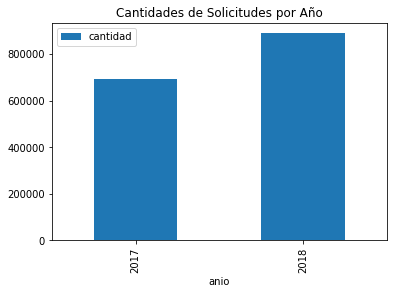

In [96]:
SQL_Query = pd.read_sql_query(
'''select left(PERIODO,4) Anio,count(1) Cantidad
from dbo.SUACI_Data
group by left(PERIODO,4)''', con)

df = pd.DataFrame(SQL_Query)

#Print plot
df.plot(kind='bar',x='anio',y='cantidad',title='Cantidades de Solicitudes por Año')
plt.show()

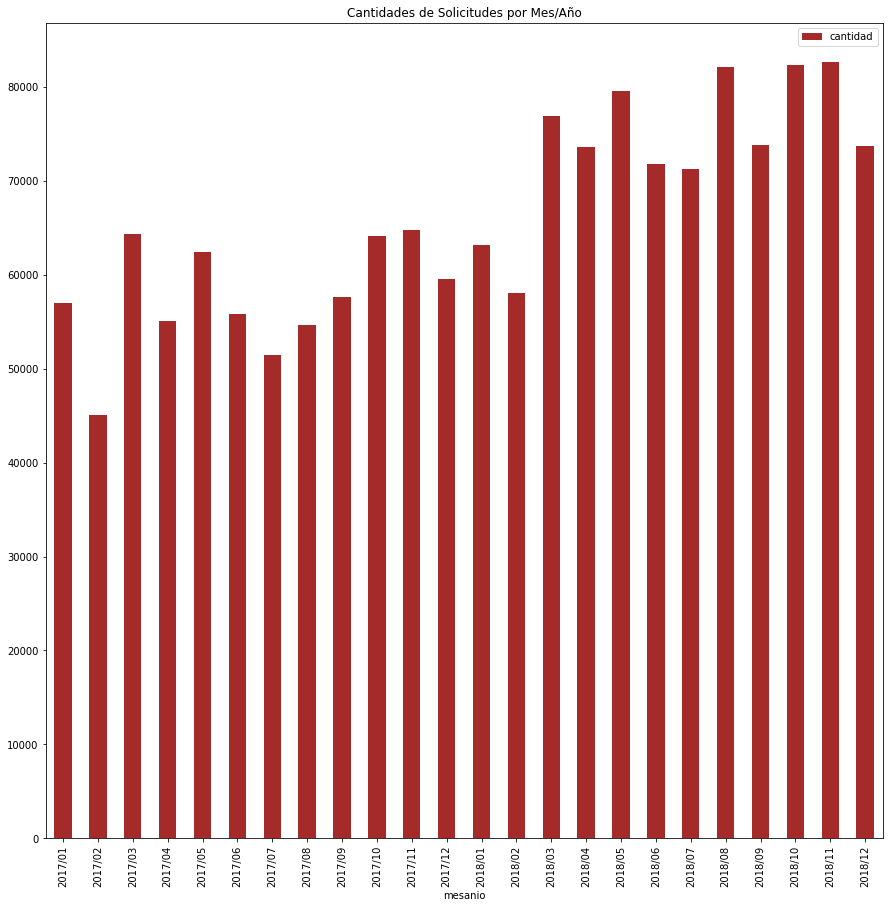

In [97]:
SQL_Query = pd.read_sql_query(
'''select left(PERIODO,4)+'/'+right(PERIODO,2) MesAnio,count(1) Cantidad
from dbo.SUACI_Data
group by PERIODO
order by 1 asc''', con)

df = pd.DataFrame(SQL_Query)

#Print plot
df.plot(kind='bar',x='mesanio',y='cantidad',color='brown',title='Cantidades de Solicitudes por Mes/Año',figsize=(15,15))
plt.show()

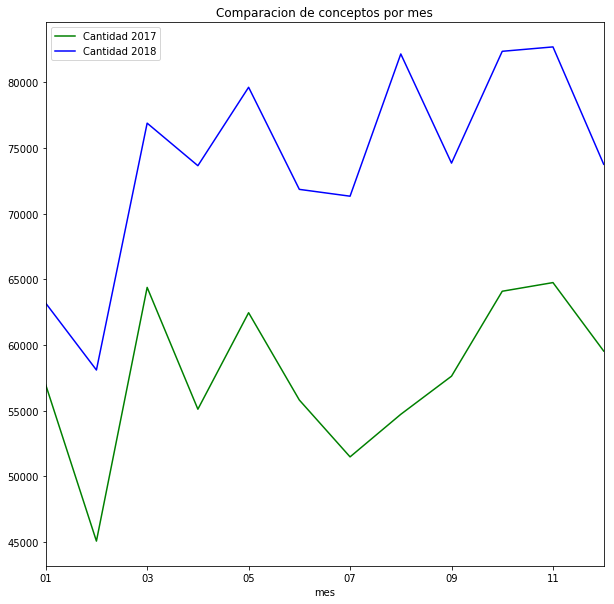

In [98]:
#Armo linea de 2017
SQL_Query = pd.read_sql_query(
'''select right(PERIODO,2) Mes,count(1) Cantidad
from dbo.SUACI_Data
where left(PERIODO,4) = 2017
group by right(PERIODO,2)
order by 1 asc''', con)

df = pd.DataFrame(SQL_Query)
ax = plt.gca()
df.plot(kind='line',x='mes',y='cantidad', color='green',ax=ax)

#Armo linea de 2018
SQL_Query = pd.read_sql_query(
'''select right(PERIODO,2) Mes,count(1) Cantidad
from dbo.SUACI_Data
where left(PERIODO,4) = 2018
group by right(PERIODO,2)
order by 1 asc''', con)

df = pd.DataFrame(SQL_Query)
ax = plt.gca()
df.plot(kind='line',x='mes',y='cantidad', color='blue', ax=ax ,title='Comparacion de conceptos por mes',figsize=(10,10))

#Print plot
ax.legend(["Cantidad 2017", "Cantidad 2018"]);
plt.show()

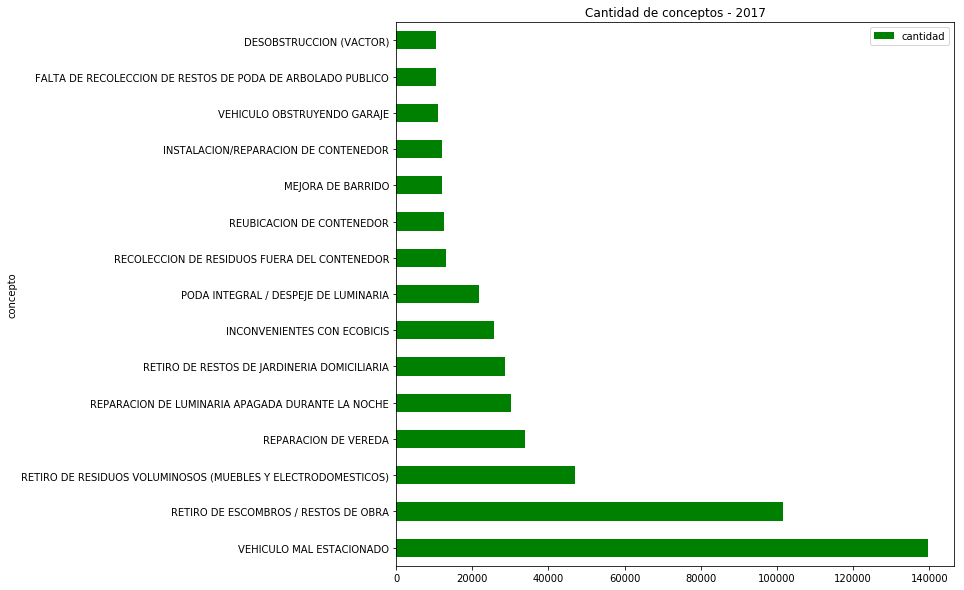

In [104]:
SQL_Query = pd.read_sql_query(
'''select top 15 concepto,count(1) Cantidad
from dbo.SUACI_Data
where left(PERIODO,4) = 2017
group by concepto
order by 2 desc''', con)

df = pd.DataFrame(SQL_Query)

#Print plot
df.plot(kind='barh',x='concepto',y='cantidad',color='green',title='Cantidad de conceptos - 2017',figsize=(10,10))
plt.show()

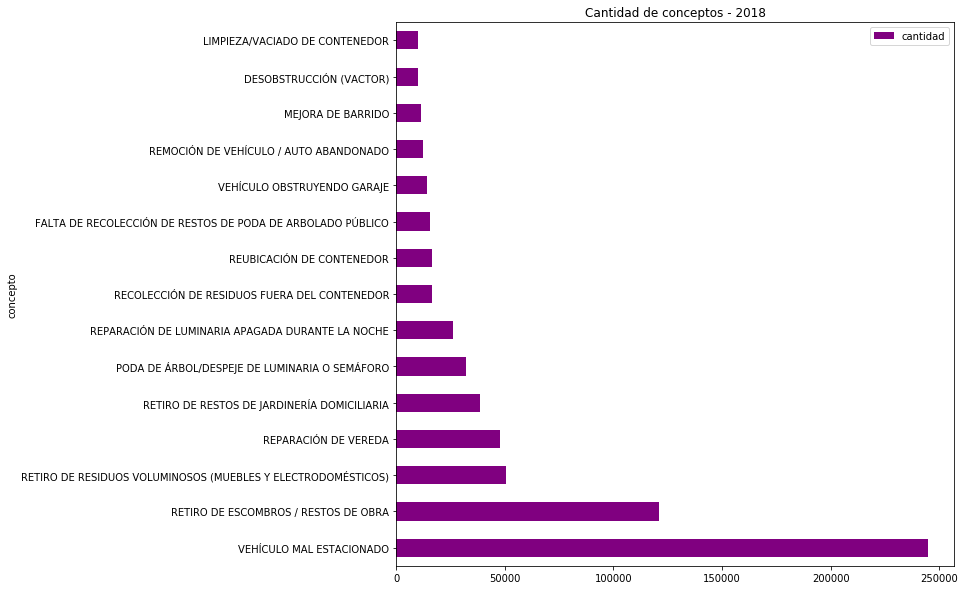

In [103]:
SQL_Query = pd.read_sql_query(
'''select top 15 concepto,count(1) Cantidad
from dbo.SUACI_Data
where left(PERIODO,4) = 2018
group by concepto
order by 2 desc''', con)

df = pd.DataFrame(SQL_Query)

#Print plot
df.plot(kind='barh',x='concepto',y='cantidad',color='purple',title='Cantidad de conceptos - 2018',figsize=(10,10))
plt.show()